In [41]:
%pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import json
import datetime
import time
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import statsmodels.formula.api as smf

In [3]:
df = pd.read_json('se-mi-reddit-comments-short.json', lines=True)

## Question 1

What time of day has the most activity?

In [4]:
def convert_to_datetime(t): 
    return datetime.datetime.utcfromtimestamp(t)
    
df['datetime'] = df.created_utc.apply(datetime.datetime.utcfromtimestamp)
df['timeofday'] = df.datetime.apply(lambda x: x.hour)
df

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,collapsed_reason_code,name,retrieved_utc,score_hidden,author_is_blocked,unrepliable_reason,media_metadata,editable,datetime,timeofday
0,Augustushomme,None,None,What do you think is so great about Oslo?,True,1,1514765161,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:06:01,0
1,PresidentShithead,None,None,How bad is it? I don’t live in Detroit but I’m...,True,0,1514771311,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 01:48:31,1
2,thehumble_1,None,None,You call the court to see what you need and wh...,True,0,1514781368,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 04:36:08,4
3,Jurion,None,None,:(,True,0,1514795626,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 08:33:46,8
4,Ajk337,None,None,I lived on the peninsula and had VZ and it wor...,True,0,1514821521,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 15:45:21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76359,Larrybear2,None,None,Not anywhere near Ford Road. Thankfully the po...,True,0,1661988472,None,0,0,...,None,t1_iml93d4,NaN,0.0,NaN,NaN,NaN,NaN,2022-08-31 23:27:52,23
76360,Mialuvailuv,None,None,Downhill mtb and climbing and generally runnin...,True,0,1661988914,None,1661992655,0,...,None,t1_imla3nr,NaN,0.0,NaN,NaN,NaN,NaN,2022-08-31 23:35:14,23
76361,Evening_Future_4515,None,None,I read that there is research that \nmelatonin...,True,1,1661989482,None,0,0,...,None,t1_imlbdw2,NaN,0.0,NaN,NaN,NaN,NaN,2022-08-31 23:44:42,23
76362,robertoromero15,None,None,Cork and Gabel has a solid cinnamon bun,True,0,1661989796,None,0,0,...,None,t1_imlc3kc,NaN,0.0,NaN,NaN,NaN,NaN,2022-08-31 23:49:56,23


<Axes: xlabel='timeofday', ylabel='count'>

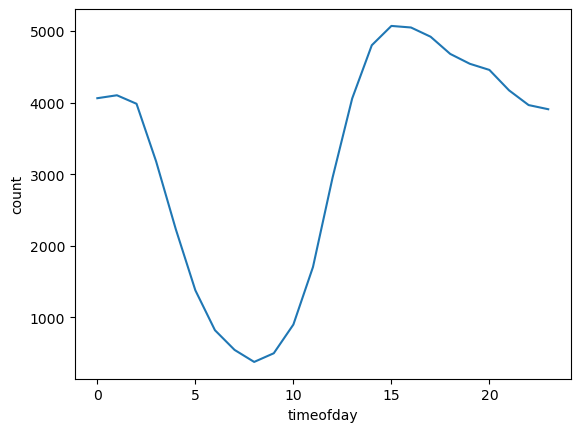

In [8]:
t = pd.DataFrame(df.groupby('timeofday').author.count().sort_values(ascending=False))
t = t.rename(columns={'author': 'count'}).reset_index()
sns.lineplot(data=t, x='timeofday', y='count')

3PM seems to have the most amount of activity. 

## Question 2

Are comments more positive or negative?

In [9]:
sa = SentimentIntensityAnalyzer()

In [10]:
def getSentiment(text):
    return 'positive' if sa.polarity_scores(text)['compound'] > 0 else 'negative'

df['sentiment'] = df.body.apply(getSentiment)

<Axes: xlabel='sentiment', ylabel='count'>

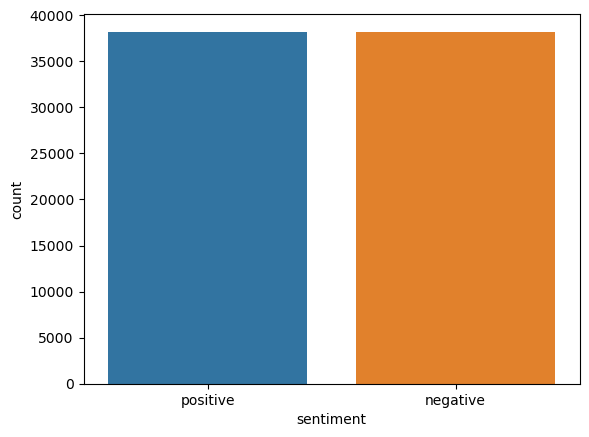

In [14]:
p = pd.DataFrame(df.groupby('sentiment').author.count().sort_values(ascending=False))
p = p.rename(columns={'author': 'count'}).reset_index()
sns.barplot(data=p, x='sentiment', y='count')

Comments on reddit tend to be more positive. 

## Question 3

What are the most common words on Reddit and graph the 30 most common words.

In [8]:
tokenizer = RegexpTokenizer('\w+')
nltk.download('stopwords')
nltk.download('vader_lexicon')
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
def create_tokens(text):
    tokens = tokenizer.tokenize(text.lower())
    arr = []
    for word in tokens: 
        if word not in stop:
            arr.append(word)
    return arr
    
df['tokens'] = df.body.apply(create_tokens)

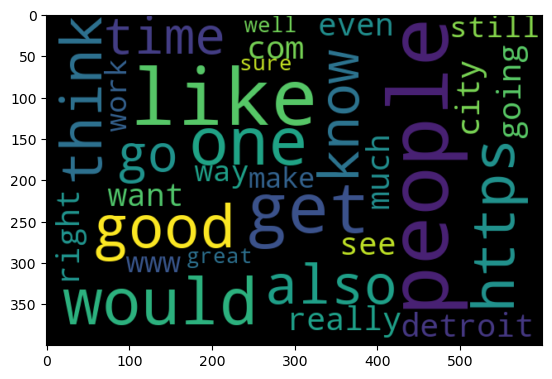

In [30]:
word_counts = Counter() 
def get_counts(tokens):
    for word in tokens:
        word_counts[word] += 1
        
df.tokens.apply(get_counts)
top_30 = {}
for word, count in word_counts.most_common(30):
    top_30[word] = count

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100)
wordcloud.generate_from_frequencies(top_30)
plt.imshow(wordcloud, interpolation='bilinear')

In [31]:
top_30

{'people': 11634,
 'like': 10466,
 'get': 7976,
 'one': 7273,
 'would': 6994,
 'good': 5793,
 'https': 5550,
 'think': 5395,
 'know': 5143,
 'also': 5033,
 'time': 4819,
 'go': 4722,
 'really': 4196,
 'city': 4163,
 'com': 4137,
 'detroit': 4123,
 'going': 4116,
 'even': 3833,
 'right': 3827,
 'see': 3801,
 'want': 3782,
 'much': 3782,
 'still': 3476,
 'www': 3429,
 'work': 3388,
 'way': 3345,
 'make': 3312,
 'great': 3234,
 'well': 3208,
 'sure': 3162}

The 5 most common words are: people, like, get, one and would.

## Question 4

Did the number of comments increase per year?

In [16]:
df['year'] = df.datetime.apply(lambda x: x.year)

<Axes: xlabel='year', ylabel='count'>

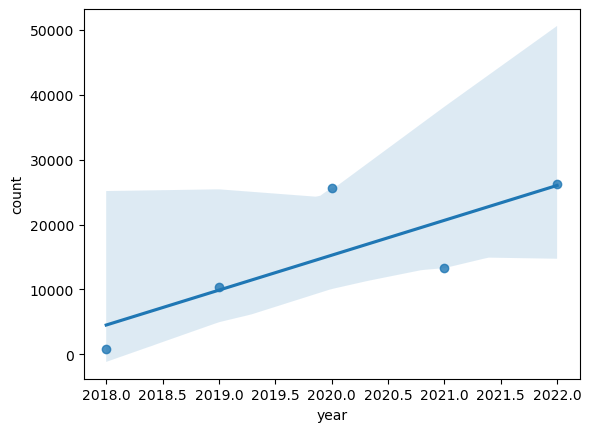

In [21]:
xasd = pd.DataFrame(df.groupby('year').author.count())
xasd = xasd.rename(columns={'author': 'count'}).reset_index()
sns.regplot(data=xasd, x='year', y='count')

There seemd to be an overall increase in comments per year.

## Question 5

Does time of day affect the number of positive and negative comments? 

In [65]:
sent_count = pd.DataFrame(df.groupby(['timeofday', 'sentiment']).sentiment.count())
sent_count = sent_count.rename(columns={'sentiment': 'count'}).reset_index()

<Axes: xlabel='timeofday', ylabel='count'>

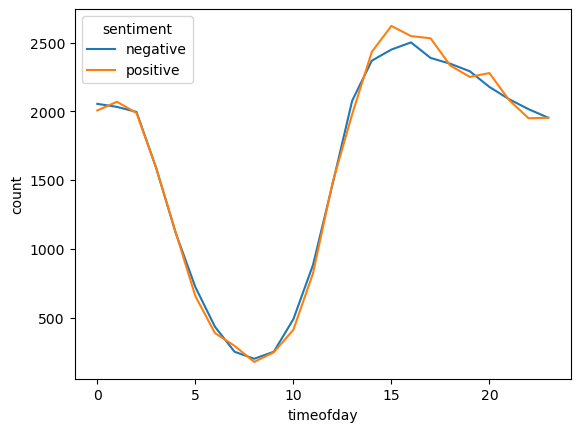

In [68]:
sns.lineplot(data=sent_count, x='timeofday', y='count', hue='sentiment')

Time of day does not seem to affect the number of positive and negative comments as the graphs for both are really similar.